# 2장 파이썬을 이용한 주성분분석

## 파이썬을 이용한 주성분분석 (1)

In [5]:
### (1) 데이터 읽기 및 기술통계량

In [1]:
# 패키지 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 데이터 읽기
heptathlon = pd.read_csv("./data/heptathlon.csv")
heptathlon.head(3)

,Unnamed: 0,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
0,Joyner-Kersee (USA),12.69,1.86,15.80,22.56,7.27,45.66,128.51,7291
1,John (GDR),12.85,1.80,16.23,23.65,6.71,42.56,126.12,6897
2,Behmer (GDR),13.20,1.83,14.20,23.10,6.68,44.54,124.20,6858


In [3]:
# 변수이름 확인하기
heptathlon.columns

Index(['Unnamed: 0', 'hurdles', 'highjump', 'shot', 'run200m', 'longjump',
       'javelin', 'run800m', 'score'],
      dtype='object')

In [4]:
# 기술통계량 구하기 - 소수점 이하 2자리 반올림 하기
round( heptathlon.describe(),2)

,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
count,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00
mean,13.84,1.78,13.12,24.65,6.15,41.48,136.05,6090.60
std,0.74,0.08,1.49,0.97,0.47,3.55,8.29,568.47
min,12.69,1.50,10.00,22.56,4.88,35.68,124.20,4566.00
25%,13.47,1.77,12.32,23.92,6.05,39.06,132.24,5746.00
50%,13.75,1.80,12.88,24.83,6.25,40.28,134.74,6137.00
75%,14.07,1.83,14.20,25.23,6.37,44.54,138.48,6351.00
max,16.42,1.86,16.23,26.61,7.27,47.50,163.43,7291.00


### (2) 변수변환 및 변수표준화

In [8]:
# 변환 : 변수최댓값 - 변수값
heptathlon.hurdles = np.max(heptathlon.hurdles) - heptathlon.hurdles
heptathlon.run200m = np.max(heptathlon.run200m) - heptathlon.run200m
heptathlon.run800m = np.max(heptathlon.run800m) - heptathlon.run800m
heptathlon.head()

,Unnamed: 0,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
0,Joyner-Kersee (USA),3.73,1.86,15.80,4.05,7.27,45.66,34.92,7291
1,John (GDR),3.57,1.80,16.23,2.96,6.71,42.56,37.31,6897
2,Behmer (GDR),3.22,1.83,14.20,3.51,6.68,44.54,39.23,6858
3,Sablovskaite (URS),2.81,1.80,15.23,2.69,6.25,42.78,31.19,6540
4,Choubenkova (URS),2.91,1.74,14.76,2.68,6.32,47.46,35.53,6540


In [9]:
# 분석변수 선택하기
feature = ['hurdles', 'highjump', 'shot', 'run200m', 'longjump', 'javelin', 'run800m']
hep_data = heptathlon[feature]

In [10]:
# 변수표준화
# from sklearn.preprocessing import StandardScaler
# x = StandardScaler().fit_transform(hep_data)

### (3) 파이썬 초기 주성분분석

In [14]:
# 초기 주성분분석
from sklearn.decomposition import PCA
pca_init = PCA(n_components=len(hep_data.columns))
pca_init.fit(hep_data)
print(pca_init.explained_variance_)

[4.64611996 1.24408391 0.54272305 0.47621544 0.25548619 0.0759954
 0.05104272]


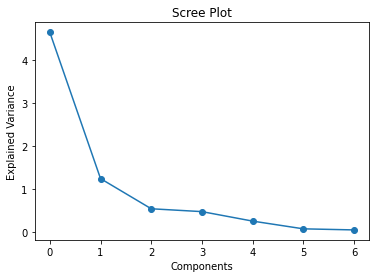

In [15]:
# 스크리 그림 그리기
plt.title('Scree Plot')
plt.xlabel('Components')
plt.ylabel('Explained Variance')
plt.plot(pca_init.explained_variance_, 'o-')
plt.show()

### (4) 파이썬 주성분분석

In [17]:
# 주성분분석 - 주성분 수 2개 추출
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
hep_pca = pca.fit_transform(x)

In [18]:
# dir(pca)
# 주성분분산
pca.explained_variance_

array([4.64611996, 1.24408391])

In [19]:
# 주성분분산 비율
pca.explained_variance_ratio_

array([0.63718217, 0.17061722])

In [20]:
# 주성분계수
np.round(pca.components_, 3)

array([[-0.453, -0.377, -0.363, -0.408, -0.456, -0.075, -0.375],
       [-0.158, -0.248,  0.289,  0.26 , -0.056,  0.842, -0.224]])

In [21]:
# 주성분점수
hep_pca[0:5, :]

array([[-4.20643487,  1.26802363],
       [-2.9416187 ,  0.53452561],
       [-2.70427114,  0.69275901],
       [-1.37105209,  0.70655862],
       [-1.38704979,  1.78931718]])

## 파이썬을 이용한 주성분분석(2)

### (1) 자료 읽기 및 기술통계량 구하기

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
# 데이터 읽기
beer = pd.read_csv('./data/beer.csv')
beer.head()

,cost,size,alcohol,reputat,color,aroma,taste
0,10,15,20,85,40,30,50
1,100,70,50,30,75,60,80
2,65,30,35,80,80,60,90
3,0,0,20,30,80,90,100
4,10,25,10,100,50,40,60


In [27]:
# 기술통계량 구하기
beer.describe()

,cost,size,alcohol,reputat,color,aroma,taste
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,27.777778,22.222222,23.888889,55.555556,63.888889,56.111111,80.555556
std,31.349106,20.256294,12.259015,25.891147,18.162469,19.789138,17.318872
min,0.000000,0.000000,10.000000,30.000000,40.000000,30.000000,50.000000
25%,10.000000,10.000000,15.000000,30.000000,50.000000,40.000000,65.000000
50%,15.000000,15.000000,20.000000,40.000000,60.000000,60.000000,85.000000
75%,25.000000,30.000000,30.000000,80.000000,80.000000,65.000000,95.000000
max,100.000000,70.000000,50.000000,100.000000,95.000000,90.000000,100.000000


### (2) 파이썬 주성분분석

In [30]:
# 주성분분석 - 주성분 수 3으로 함
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_beer = pca.fit_transform(beer)

In [31]:
# 주성분분산
pca.explained_variance_

array([1545.79201197, 1222.20770757,  326.39050166])

In [33]:
# 주성분표준편차
np.sqrt(pca.explained_variance_)

array([39.31656155, 34.96008735, 18.06628079])

In [34]:
# 주성분분산비율
pca.explained_variance_ratio_

array([0.47781193, 0.37779042, 0.10088891])

In [35]:
# 주성분계수
np.round(pca.components_, 3)

array([[ 0.734,  0.394,  0.283, -0.336,  0.266,  0.14 ,  0.149],
       [-0.319, -0.34 , -0.069, -0.491,  0.344,  0.485,  0.429],
       [-0.19 ,  0.127,  0.037, -0.786, -0.386, -0.369, -0.206]])